# Разведочный анализ данных (exploratory data analysis, EDA)

# Подготовка

### Импорты

In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy
import scipy.stats as stats

In [3]:
import sklearn.linear_model as lm

In [4]:
import json

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import re

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Опции

In [9]:
pd.set_option('display.float_format', '{:,.2f}'.format)
# разделитель ',' и два знака после запятой у чисел с плавающей точкой

In [10]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

In [11]:
# Сброс ограничений на число столбцов
pd.reset_option('display.max_columns')

In [12]:
pd.set_option('display.max_colwidth', None)
# Установите для отображения самой большой линии

In [13]:
pd.reset_option('display.max_colwidth')
# Сброс ограничений на количество символов в записи

#### опции для графики

In [14]:
large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')


In [15]:
sns.set_palette('deep') 
sns.set_style("whitegrid")

## Заливка данных

In [16]:
# полный датафрейм со всеми столбцами
# full_df = pd.read_csv('region_roles_26.05.22_CSV.csv', encoding='windows-1251', sep=';')

In [17]:
# full_df.info()

In [18]:
# full_df.shape

In [19]:
# full_df.isna().sum()

#### Что в столбцах?

In [20]:
# df.premium.value_counts()
# удалить

In [21]:
# df.name.value_counts()

In [22]:
# df.department.value_counts()
# delete

In [23]:
# df.has_test.value_counts()
# delete

In [24]:
# df.response_letter_required.value_counts()
# delete

In [25]:
# df.area.value_counts()
# delete

In [26]:
# df.salary.value_counts()

In [27]:
# df.type.value_counts()
# delete

In [28]:
# df.address.value_counts()
# delete

In [29]:
# df.response_url.value_counts()
# delete

In [30]:
# df.sort_point_distance.value_counts()
# delete

In [31]:
# df.archived.value_counts()
# delete

In [32]:
# df.insider_interview.value_counts()
# delete

In [33]:
# df.url.value_counts()
# delete

In [34]:
# df.alternate_url.value_counts()
# delete

In [35]:
# df.relations.value_counts()
# delete

In [36]:
# df.employer.value_counts()
# delete

In [37]:
# df.snippet.value_counts()
# delete не нужен для целей исследования

In [38]:
# df.contacts.value_counts()
# delete

In [39]:
# df.schedule.value_counts()


In [40]:
# df.working_days.value_counts()
# delete

In [41]:
# df.working_time_intervals.value_counts()
# delete

In [42]:
# df.working_time_modes.value_counts()
# delete

In [43]:
# df.accept_temporary.value_counts()
# delete

In [44]:
# df.experience.value_counts()

In [45]:
# df.region.value_counts()

In [46]:
# df.immediate_redirect_url.value_counts()
# delete

#### Cокращенный dataframe

In [47]:
list_columns = [
    'id',
    'name',
    'salary',
    'experience',
    'schedule',
    'key_skills',
    'specializations',
    'region'
]

In [48]:
# dataframe после анализа содержимого столбцов
df = pd.read_csv('region_roles_26.05.22_CSV.csv', usecols=list_columns, encoding='windows-1251', sep=';')

3,7s

# EDA (3 этапа)

## 🟩 1. Первичный анализ датасета

- Знакомимся с таблицей данных
- Оцениваем ее объем
- Оцениваем признаки объектов, хранящихся в ней
- Выявляем наличие пропусков

### общая информация

In [49]:
df.head(2)

,id,name,salary,schedule,experience,key_skills,specializations,region
0,50632962,Консультант по информационной безопасности,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва
1,49062175,Product Manager (Разработка ПО в сфере Информа...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               69656 non-null  int64 
 1   name             69656 non-null  object
 2   salary           37590 non-null  object
 3   schedule         69656 non-null  object
 4   experience       69656 non-null  object
 5   key_skills       69656 non-null  object
 6   specializations  69656 non-null  object
 7   region           69656 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.3+ MB


In [51]:
df.shape

(69656, 8)

In [52]:
df.isna().sum()
# поиск пропущенных значений

id                     0
name                   0
salary             32066
schedule               0
experience             0
key_skills             0
specializations        0
region                 0
dtype: int64

In [53]:
# список столбцов в виде list()
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region']

### Есть дубликаты?

In [54]:
df.duplicated().sum()

233

удаляем дубликаты

In [55]:
df = df.drop_duplicates()

проверяем

In [56]:
df.duplicated().sum()

0

In [57]:
df.shape

(69423, 8)

### Преобразовываем строку JSON

json.loads
Считывание строки в формате JSON в объект Python

json.dumps
Преобразование объекта в строку в формате JSON. Функция dumps() модуля json сериализирует объект Python obj в строку str формата JSON. Сериализация объектов Python выполняется согласно таблице преобразования

In [58]:
# Преобразование json с dumps
def text_to_json_dumps(text):
    text = text.replace("'", '"')
    try:
        return json.loads(json.dumps(text))
    except:
        print('error')

In [59]:
# Преобразование json с заменой подстроки
def text_to_json_str(text):
    try:
        return json.loads(text.replace('"', '').replace("'", '"'))
    except:
        print('error')
        # return []

### Очищаем dataframe от данных, не относящихся к IT

In [60]:
# для упрощения обработки приводим строки к нижнему регистру
df['name'] = df['name'].str.lower()
df['schedule'] = df['schedule'].str.lower()
df['experience'] = df['experience'].str.lower()
df['key_skills'] = df['key_skills'].str.lower()
df['specializations'] = df['specializations'].str.lower()

смотрим рандомную ячейку

In [61]:
df.name[:3]

0           консультант по информационной безопасности
1    product manager (разработка по в сфере информа...
2               эксперт по компьютерной криминалистике
Name: name, dtype: object

Создаем список подстрок, не относящихся к IT-специализации

In [62]:
lst_not_it = [
    'недви',
    'персон', 
    'кадр',
    'рекру',
    'hr',
    'продаж',
    'риэл',
    'риел',
    'контент',
    'зал',
    'артист',
    'smm',
    'инструкт',
    'тренер',
    'креатив',
    'ретуш',
    'аренд',
    'псих',
    'табел',
    'лаборат',
    'смет',
    'менеджер по работе с клиентами',
    'компенсац',
    'обуч',
    'помещен',
    'межев',
    'ипоте',
    'маркетол',
    'блогер',
    'кдп',
    'recruiter',
    'труд',
    'специалист по работе с клиентами',
    'штат',
    'продавец',
    'офис',
    'брокер',
    'смм',
    'ресеч',
    'торг',
    'менедж',
    'воин',
    'новострой',
    'pr',
    'маркетинг',
    'реклам',
    'арт',
    'агент',
    'строи',
    'энергет',
    'табель',
    'плав',
    'интерьер', 
    'бокс'
    ]


Сепарируем столбец 'name' на 2 dataframe: 1) с наименованиями из списка 2) остальное

In [63]:
pat = '|'.join(lst_not_it)
temp_df = df[df['name'].str.contains(pat)]
df = df[~df.index.isin(temp_df.index)]

отсекли 24 тыс. строк

In [64]:
temp_df.shape

(24348, 8)

В датасете осталось 45 тыс.строк

In [65]:
df.shape

(45075, 8)

#### Работаем со столбцом specializations,
чтобы очистить dataframe от данных, не относящихся к IT, что позволит точнее провести описательную статистику

смотрим рандомную ячейку

In [66]:
df.specializations[0]

"[{'id': '1.110', 'name': 'компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'консалтинг, аутсорсинг', 'profarea_id': '1', 'profarea_name': 'информационные технологии, интернет, телеком'}]"

Преобразуем данные json и сохраним их в столбце specializations_jsn

In [67]:
df['specializations_jsn'] = df['specializations'].apply(text_to_json_dumps)

Создаем функцию, вытаскивающую тег 'profarea_id'. Это Идентификатор профессиональной области, в которую входит специализация. 1 - Информационные технологии, интернет, телеком. То, что нам надо для исследования

In [68]:
def get_tag_profarea_id(text):
    text = json.loads(text)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['profarea_id'])
            return out
    except:
        print('error')


Создаем новый столбец 'profarea_id'

In [69]:
df['profarea_id'] = df.specializations_jsn.apply(get_tag_profarea_id)

Создаем функцию поиска элемента '1' в списке для того, чтобы сепарировать строки dataframe со специализацией 1 - Информационные технологии, интернет, телеком

In [70]:
def find_1(lst):
    return '1' in lst

Создаем столбец 'profarea_id_1'

In [71]:
df['profarea_id_1'] = df['profarea_id'].apply(find_1)

Разделяем dataframe по признаку отношения специализации к IT

In [72]:
it_false = df[df['profarea_id_1'] == 0]

отсекли еще 872 строки

In [73]:
it_false.shape

(872, 11)

In [74]:
df = df[df['profarea_id_1'] == 1]

В dataframe 44 тыс. строк из первоначальных 69 тыс.

In [75]:
df.shape

(44203, 11)

## 🟩 2. Анализ и визуализация отдельных колонок

### 🔶 Работаем со столбцом salary

🎯 Цель: получить столбец **'salary_from_ru'** в формате int <br>
Надо вытащить данные по salary from и привести все данные к рублевому эквиваленту. Сделать описательную статистику, визуализацию, посмотреть выбросы, аномалии.

смотрим рандомную ячейку

In [76]:
df.salary[3]

"{'from': 26000, 'to': None, 'currency': 'RUR', 'gross': True}"

Для исследования возьмем только начальный уровень зарплаты, указанный в теге 'from'. Как правило, если работодатель указывает уровень зарплаты, то начальная зарплата практически всегда присутствует, что не скажешь о верхней границе зарплаты.

вытаскиваем тег 'from' из salary

In [77]:
def salary_from(salary):
    if pd.isna(salary): # добавляем обработку None
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

Так как часть зарплат указаны не в рублях, то надо будет привести все зарплаты к одной валюте (ru). Для это вытаскиваем тег 'currency' из salary

In [78]:
def salary_currency(salary):
    if pd.isna(salary): # добавляем обработку None
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][12:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

In [79]:
df['salary_currency'] = df.salary.apply(salary_currency)

In [80]:
df['salary_from'] = df.salary.apply(salary_from)

In [81]:
df['salary_from'] = pd.to_numeric(df['salary_from'])

приводим все salary_from в рубли

In [82]:
def get_rate(currency):
    rur =  1
    doll = 70
    eur = 75
    kzt = 0.13
    if currency is np.nan:
        return np.nan
    else:
        if currency.find('RUR') >= 0:
            return rur
        elif currency.find('USD') >= 0:
            return doll
        elif currency.find('EUR') >= 0:
            return eur
        elif currency.find('KZT') >= 0:
            return kzt

In [83]:
df['salary_from_ru'] = df.salary_from * df.salary_currency.apply(get_rate)

проверка

In [84]:
df[['salary_from', 'salary_currency', 'salary_from_ru']].sort_values('salary_currency', ascending=False)[:5]

,salary_from,salary_currency,salary_from_ru
38363,NaN,'USD',NaN
31101,"4,000.00",'USD',"280,000.00"
27440,"2,500.00",'USD',"175,000.00"
24138,"2,000.00",'USD',"140,000.00"
27450,"1,200.00",'USD',"84,000.00"


Выбираем на что менять NaN в столбце 'salary_fro_ru'

In [85]:
(
    df.salary_from_ru.mean(),
    df.salary_from_ru.median(),
    df.salary_from_ru.min(),
    df.salary_from_ru.max()
)

(85367.78599420685, 65000.0, 25.0, 1000000.0)

Медиана меньше зависима от выбросов и лучше подходит для заполнения ячеек NaN

In [86]:
agg_func_math_ = {
    'salary_from_ru': ['median']
}
# задаем список функций по определенному столбцу с расчетными данными

region_salary_ru = df.groupby('region', dropna=True).agg(agg_func_math_).round(2).fillna(0)
# ! если включаем строки с NaN при расчете, то: dropna=False

переименовываем столбец

In [87]:
region_salary_ru.columns.tolist()

[('salary_from_ru', 'median')]

In [88]:
region_salary_ru.columns = ['_'.join(col).strip() for col in region_salary_ru.columns.values]

In [89]:
region_salary_ru.head().reset_index()

,region,salary_from_ru_median
0,Алтайский край,"45,000.00"
1,Амурская область,"41,500.00"
2,Архангельская область,"48,000.00"
3,Астраханская область,"27,000.00"
4,Белгородская область,"47,500.00"


Заджойним region_salary_ru в df

In [90]:
df = df.merge(region_salary_ru, on='region', how='inner')

In [91]:
df.salary_from_ru.isna().sum()

26596

In [92]:
df.salary_from_ru.median()

65000.0

Так как медианные зарплаты различаются по регионам. Будем ячейки NaN в колонке 'salary_from_ru' заменять на медианную зарплату с учетом региона.

Синтаксис:
DataFrame.loc[condition, column_name] = new_value

In [93]:
df.loc[(df.salary_from_ru.isna()), 'salary_from_ru'] = df.salary_from_ru_median

проверяем 

In [94]:
df.salary_from_ru.isna().sum()

0

смотрим, есть ли нулевые значения в зарплатах

In [95]:
df[df.salary_from_ru == 0]

,id,name,salary,schedule,experience,key_skills,specializations,region,specializations_jsn,profarea_id,profarea_id_1,salary_currency,salary_from,salary_from_ru,salary_from_ru_median
44199,55240038,руководитель проекта модернизации морской плат...,NaN,"{'id': 'fullday', 'name': 'полный день'}","{'id': 'between3and6', 'name': 'от 3 до 6 лет'}","[{'name': 'английский язык'}, {'name': 'ms pow...","[{'id': '1.221', 'name': 'программирование, ра...",Ненецкий АО,"[{""id"": ""1.221"", ""name"": ""программирование, ра...","[1, 1, 1]",True,NaN,NaN,0.00,0.00
44200,55312726,qa engineer (manual),NaN,"{'id': 'fullday', 'name': 'полный день'}","{'id': 'between1and3', 'name': 'от 1 года до 3...","[{'name': 'sql'}, {'name': 'тестирование'}, {'...","[{'id': '1.221', 'name': 'программирование, ра...",Ненецкий АО,"[{""id"": ""1.221"", ""name"": ""программирование, ра...","[1, 1, 1]",True,NaN,NaN,0.00,0.00
44201,54740813,аналитик / медиа-аналитик,NaN,"{'id': 'fullday', 'name': 'полный день'}","{'id': 'between1and3', 'name': 'от 1 года до 3...","[{'name': 'ms powerpoint'}, {'name': 'монитори...","[{'id': '17.751', 'name': 'другое', 'profarea_...",Чукотский АО,"[{""id"": ""17.751"", ""name"": ""другое"", ""profarea_...","[17, 1, 3, 12]",True,NaN,NaN,0.00,0.00
44202,55490028,руководитель отдела ит,NaN,"{'id': 'fullday', 'name': 'полный день'}","{'id': 'between3and6', 'name': 'от 3 до 6 лет'}","[{'name': 'информационные технологии'}, {'name...","[{'id': '9.94', 'name': 'информационные технол...",Чукотский АО,"[{""id"": ""9.94"", ""name"": ""информационные технол...","[9, 1]",True,NaN,NaN,0.00,0.00


у нас есть 4 строки с нулевыми зарплатами. Это связано с тем, что по данным регионам (Чукотка, Ненецкий АО) не было данных по зарплате. Уберем эти строки из dataframe

In [96]:
df = df[df.salary_from_ru != 0]

In [97]:
df.shape

(44199, 15)

'salary_from_ru' - количественный тип данных. Посмотрим статистику по столбцу

In [98]:
df.salary_from_ru.describe()

count      44,199.00
mean       79,782.84
std        46,117.25
min            25.00
25%        50,000.00
50%        76,000.00
75%       100,000.00
max     1,000,000.00
Name: salary_from_ru, dtype: float64

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


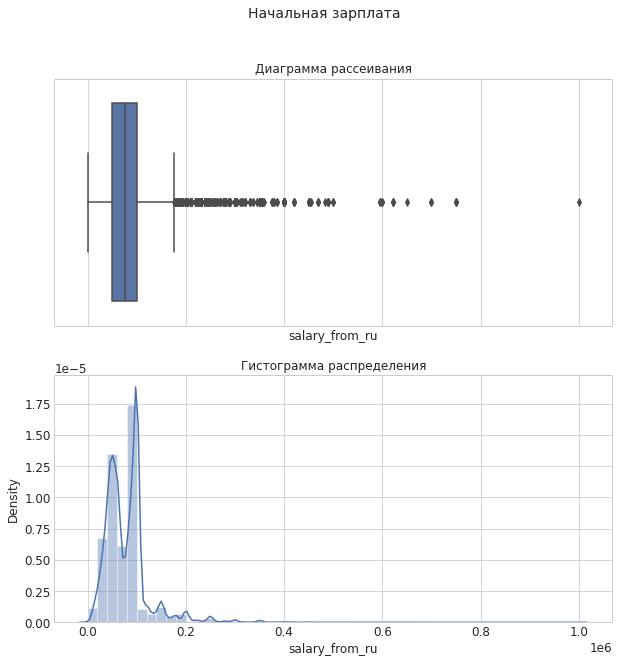

In [99]:
f, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].set_title('Диаграмма рассеивания')
ax[1].set_title('Гистограмма распределения')
sns.boxplot(df.salary_from_ru, ax=ax[0])
sns.distplot(df.salary_from_ru, ax=ax[1])
plt.suptitle('Начальная зарплата', size=14)
plt.show()

создадим функцию для распечатки значений box-plot

In [100]:
def get_boxplot_values(data):
    median = np.median(data)
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)

    iqr = upper_quartile - lower_quartile
    upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
    lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

    print('lower_whisker: ', lower_whisker)
    print('quartile_25: ', lower_quartile )
    print('median: ', median)
    print('quartile_75: ', upper_quartile)
    print('upper_whisker: ', upper_whisker)
    

In [101]:
get_boxplot_values(df.salary_from_ru)

lower_whisker:  25.0
quartile_25:  50000.0
median:  76000.0
quartile_75:  100000.0
upper_whisker:  175000.0


посмотрим ТОП10 зарплат

In [102]:
df.salary_from_ru.sort_values(ascending=False)[:10]

33243   1,000,000.00
42002     750,000.00
33251     750,000.00
12824     750,000.00
10489     700,000.00
32242     700,000.00
12860     650,000.00
42003     622,500.00
12825     622,500.00
33238     622,500.00
Name: salary_from_ru, dtype: float64

посмотрим подробнее на максимумы по зарплате

In [103]:
df.loc[33243]

id                                                                55358358
name                                                  технический директор
salary                   {'from': 1000000, 'to': None, 'currency': 'RUR...
schedule                          {'id': 'fullday', 'name': 'полный день'}
experience                      {'id': 'morethan6', 'name': 'более 6 лет'}
key_skills                                                              []
specializations          [{'id': '9.94', 'name': 'информационные технол...
region                                                     Санкт-Петербург
specializations_jsn      [{"id": "9.94", "name": "информационные технол...
profarea_id                                                         [9, 1]
profarea_id_1                                                         True
salary_currency                                                      'RUR'
salary_from                                                   1,000,000.00
salary_from_ru           

In [104]:
df.loc[42002]

id                                                                55267657
name                     cto / global head of technology – hamburg, ger...
salary                   {'from': 10000, 'to': None, 'currency': 'EUR',...
schedule                          {'id': 'fullday', 'name': 'полный день'}
experience                      {'id': 'morethan6', 'name': 'более 6 лет'}
key_skills               [{'name': 'java'}, {'name': 'javascript'}, {'n...
specializations          [{'id': '9.94', 'name': 'информационные технол...
region                                               Новосибирская область
specializations_jsn      [{"id": "9.94", "name": "информационные технол...
profarea_id                                                         [9, 1]
profarea_id_1                                                         True
salary_currency                                                      'EUR'
salary_from                                                      10,000.00
salary_from_ru           

📌 Это зарплаты для топ-менеджеров с опытом работы от 6 лет. Думаю, что это не наша целевая аудитория

проанализируем диапазон зарплат. Создадим столбец 'band_salary' с категориальными данными.

In [105]:
df['band_salary'] = 0
for i in range(len(df.salary_from_ru)):
    if df.salary_from_ru[i] > 0 and df.salary_from_ru[i] <= 50000:
        df['band_salary'][i] = 'до 50 т.р. вкл'
    elif df.salary_from_ru[i] > 50000 and df.salary_from_ru[i] <= 100000:
        df['band_salary'][i] = 'от 50 до 100 т.р. вкл'
    elif df.salary_from_ru[i] > 100000:
        df['band_salary'][i] = 'от 100 т.р.'

/tmp/ipykernel_4368/3561420959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['band_salary'][i] = 'от 50 до 100 т.р. вкл'


In [106]:
df.band_salary.value_counts()

от 50 до 100 т.р. вкл    25923
до 50 т.р. вкл           13705
от 100 т.р.               4571
Name: band_salary, dtype: int64

посмотрим медиану по группам

In [107]:
df.groupby('band_salary')['salary_from_ru'].median()

band_salary
до 50 т.р. вкл           40,000.00
от 100 т.р.             150,000.00
от 50 до 100 т.р. вкл    89,000.00
Name: salary_from_ru, dtype: float64

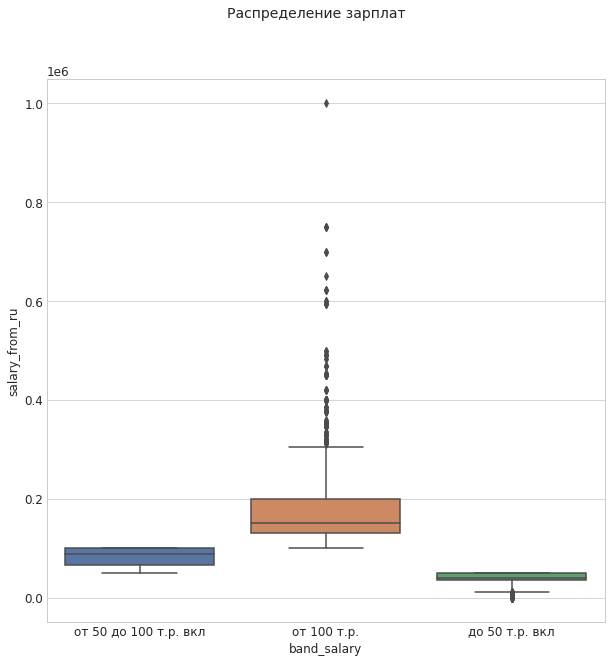

In [108]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='band_salary', y='salary_from_ru', data=df)
plt.suptitle('Распределение зарплат', size=14)
plt.show()

обработаем max выбросы

In [109]:
# percentile_min = np.percentile(df['salary_from_ru'], 3) # 3% процентиль
percentile_max = np.percentile(df['salary_from_ru'], 99) # 99% процентиль
# t = df[(df['salary_from_ru'] > percentile_min) & (df['salary_from_ru'] < percentile_max)]
t = df[df['salary_from_ru'] < percentile_max]

In [110]:
df.shape

(44199, 16)

In [111]:
t.shape

(43531, 16)

In [112]:
percentile_max

250000.0

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


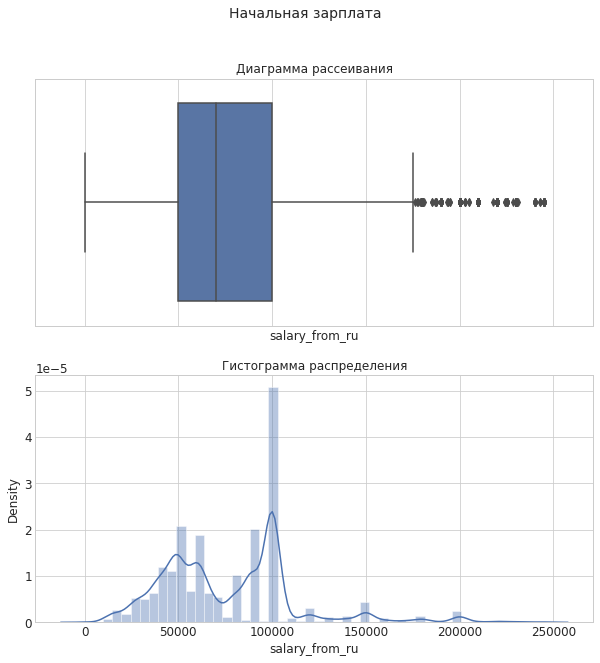

In [113]:
f, ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].set_title('Диаграмма рассеивания')
ax[1].set_title('Гистограмма распределения')
sns.boxplot(t.salary_from_ru, ax=ax[0])
sns.distplot(t.salary_from_ru, ax=ax[1])
plt.suptitle('Начальная зарплата', size=14)
plt.show()

In [114]:
df = t.copy()

проверим на нормальность

In [115]:
stats.shapiro(df.salary_from_ru) # критерий Шапиро-Уилка

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9130041599273682, pvalue=0.0)

In [116]:
stats.normaltest(df.salary_from_ru) # тест д'Агостино

NormaltestResult(statistic=7681.7050785195825, pvalue=0.0)

Проверим еще по критерию асимметрии и эксцесса.
Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)
Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)

In [117]:
df.salary_from_ru.skew() # коэффициент асимметрии

1.0548964696243919

In [118]:
df.salary_from_ru.kurtosis() # коэффициент эксцесса

2.081507966485628

📌 По графику не очевидно, что распределение нормальное, к тому же имеются несколько пиков.
Тесты показывают pvalue=0.0, коэффициент эксцесса на границе отклонений, коэффициент ассиметрии пересек границу отклонения +-1.
Что позволяют нам опровергнуть нулевую гипотезу о нормальности распределения.

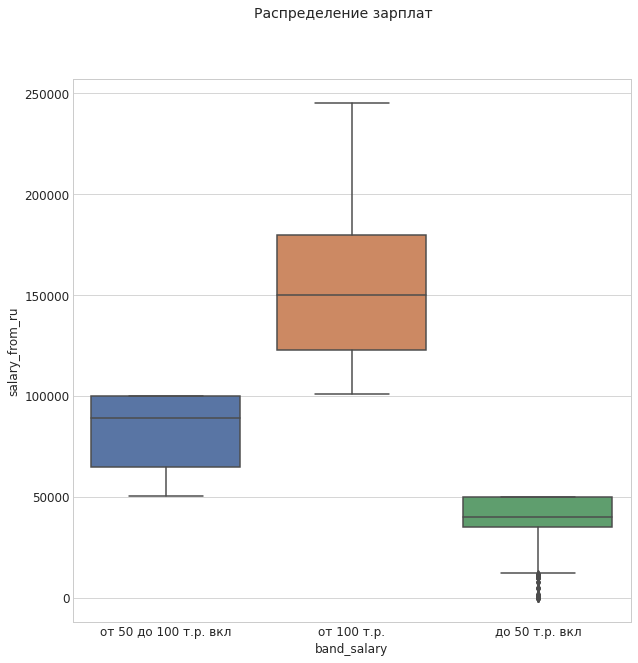

In [119]:
f, ax = plt.subplots(figsize=(10, 10))
hue_order = ['до 50 т.р. вкл', 'от 50 до 100 т.р. вкл', 'от 100 т.р.']
fig = sns.boxplot(x='band_salary', y='salary_from_ru', data=df, hue_order=hue_order)
plt.suptitle('Распределение зарплат', size=14)
plt.show()

In [120]:
get_boxplot_values(df[df['band_salary'] == 'от 50 до 100 т.р. вкл']['salary_from_ru'])

lower_whisker:  50300.0
quartile_25:  65000.0
median:  89000.0
quartile_75:  100000.0
upper_whisker:  100000.0


<function matplotlib.pyplot.show(close=None, block=None)>

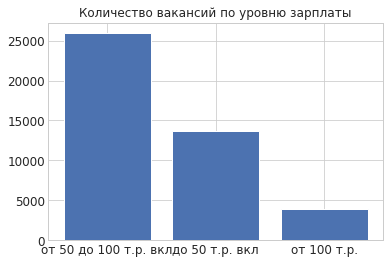

In [121]:
plt.bar(
    df.band_salary.value_counts().index,
    df.band_salary.value_counts().values
)
plt.title('Количество вакансий по уровню зарплаты')
plt.show

📌 Больше всего вакансий с зарплатами от 50 до 100 тыс.руб. Они плотно сгруппированы в промежутке от 65 до 100 тыс.руб. с ассиметрией в сторону максимума по зарплате.

#### ТОП10 (⬆⬇) регионов по уровню медианы начальной зарплаты

In [122]:
region_salary_ru.sort_values('salary_from_ru_median', ascending=False)[:10]

,salary_from_ru_median
region,
Москва,"100,000.00"
Санкт-Петербург,"89,000.00"
Республика Адыгея,"80,000.00"
Новосибирская область,"80,000.00"
Магаданская область,"77,879.00"
Томская область,"70,000.00"
Ленинградская область,"65,546.00"
Свердловская область,"65,000.00"
Московская область,"62,750.00"


In [123]:
region_salary_ru.sort_values('salary_from_ru_median', ascending=True)[:10]

,salary_from_ru_median
region,
Ненецкий АО,0.00
Чукотский АО,0.00
Республика Ингушетия,"20,500.00"
Республика Алтай,"25,000.00"
Республика Северная Осетия-Алания,"25,500.00"
Кабардино-Балкарская республика,"26,000.00"
Чеченская республика,"26,500.00"
Карачаево-Черкесская Республика,"26,500.00"
Астраханская область,"27,000.00"


In [124]:
region_salary_ru.describe()

,salary_from_ru_median
count,84.00
mean,"46,104.71"
std,"16,128.42"
min,0.00
25%,"36,687.50"
50%,"45,750.00"
75%,"51,500.00"
max,"100,000.00"


In [125]:
df[df.region == 'Республика Адыгея'].shape

(26, 16)

📌 Москва прогнозируемо на первом месте. Республики Северного Кавказа среди аутсайдеров, за исключением Адыгеи, которая попала в лидеры (c 26 вакансиями). 
Средняя медиана зарплат по стране составляет 46 тыс.руб.

### 🔶 Анализируем количество и частоту специализаций

🎯 Цель: создать таблицу **'specializations_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. Посмотреть какие специализации встречаются чаще всего.

#### Агрегируем данные по тегу name колонки 'specializations'

In [126]:
df.specializations[0]

"[{'id': '1.110', 'name': 'компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'консалтинг, аутсорсинг', 'profarea_id': '1', 'profarea_name': 'информационные технологии, интернет, телеком'}]"

пишем функцию для получения тега 'name'

In [127]:
def get_tag_name(jsn):
    text = json.loads(jsn)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['name'])
            return out
    except:
        print('error')

создаем столбец 'specializations_name', вытаскиваем тег 'name' из колонки 'specializations'

In [128]:
df['specializations_name'] = df.specializations_jsn.apply(get_tag_name)

In [129]:
specializations_region = df[['specializations_name', 'region']].explode('specializations_name')

удаляем строки, не относящиеся к IT-специализации

In [130]:
specializations_region['specializations_name'] = specializations_region['specializations_name'].str.lower()

Сепарируем столбец 'specializations_name': 1) с наименованиями из списка 'lst_not_it' 2) остальное

In [131]:
pat = '|'.join(lst_not_it)
temp_ = specializations_region[specializations_region['specializations_name'].str.contains(pat)]
it_sp = specializations_region[~specializations_region.index.isin(temp_.index)]

In [132]:
temp_.shape

(323, 2)

In [133]:
it_sp.shape

(191080, 2)

In [134]:
specialization_frequency = (it_sp
                .specializations_name
                .value_counts()
                .reset_index()
)

Переименуем столбцы

In [135]:
specialization_frequency = specialization_frequency.rename(columns={'index': 'specialization', 'specializations_name': 'frequency'})

In [136]:
specialization_frequency.head()

,specialization,frequency
0,инженер,30419
1,"программирование, разработка",21295
2,системы управления предприятием (erp),15691
3,"поддержка, helpdesk",14200
4,системный администратор,14122


Специализация с частотой больше 500

In [137]:
specialization_frequency[specialization_frequency.frequency > 500]

,specialization,frequency
0,инженер,30419
1,"программирование, разработка",21295
2,системы управления предприятием (erp),15691
3,"поддержка, helpdesk",14200
4,системный администратор,14122
5,web инженер,13683
6,web мастер,13656
7,интернет,11446
8,аналитик,9899
9,другое,9645


📌 frequence - количественный тип данных

посмотрим статистику

In [138]:
specialization_frequency.describe()

,frequency
count,82.00
mean,"2,330.24"
std,"5,491.52"
min,1.00
25%,1.00
50%,6.00
75%,636.25
max,"30,419.00"


/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


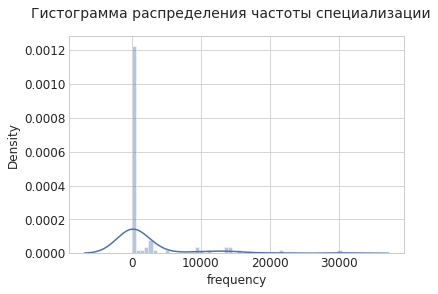

In [139]:
sns.distplot(specialization_frequency.frequency)
plt.suptitle('Гистограмма распределения частоты специализации', size=14)
plt.show()

📌 Мы видим  82 специализации из каталога hh.ru. В каталоге 2 уровня: верхний — профессиональная область и нижний — специализация. Профессиональная область для данного исследования это Информационные технологии, интернет, телеком.  

По гистограмме распределения видно, что нет высокой концентрации вакансий по нескольким специализациям. Наоборот, очень много маленьких групп с частотой специализации от 1 до 6. 

Наибольшее количество упоминаний у специализаций: 1) инженер - 30881, 2) программирование, разработка - 21722, и 3) системы управления предприятием (erp) - 16082. 
Можно предположить о наличии спроса на кандидатов с инженерным мышлением/образованием/бэкграундом для разработки с пониманием бизнеса и процессов на предприятиях.

### 🔶 Анализируем количество и частоту навыков

🎯 Цель: создать таблицу **'skills_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. Посмотреть какие скиллы встречаются чаще всего.

создаем функцию, объединяющую наименования по ключевым словам

In [140]:
def group_name(text):
    if re.search(r'1с|1c|1 c|1 с', text) is not None:
        text = '1c'
    elif re.search(r'qa|tester|тестер|тестир', text) is not None:
        text = 'qa'
    elif re.search(r'c\+\+|с\+\+|c#|с#', text) is not None:
        text = 'c c+ c#'
    elif re.search(r'sql|postgresql', text) is not None:
        text = 'sql'
    elif re.search(r'java', text) is not None:
        text = 'java'
    elif re.search(r'js|javascript', text) is not None:
        text = 'javascript'
    elif re.search(r'python|питон', text) is not None:
        text = 'python'
    elif re.search(r'devops', text) is not None:
        text = 'devops'
    elif re.search(r'\.net', text) is not None:
        text = '.net'
    elif re.search(r'android', text) is not None:
        text = 'android'
    elif re.search(r'yandex|яндекс|яndex', text) is not None:
        text = 'yandex'
    elif re.search(r'поддерж|support|эксплуат|сервис', text) is not None:
        text = 'support'
    elif re.search(r'secur|безопасн|криминал|защит', text) is not None:
        text = 'security'
    elif re.search(r'data|данны|etl', text) is not None:
        text = 'data'
    elif re.search(r'web|веб|вэб|html|tcp', text) is not None:
        text = 'web'
    elif re.search(r'системный администратор', text) is not None:
        text = 'sysadmin'
    elif re.search(r'системный аналитик|system anal', text) is not None:
        text = 'system analyst'
    elif re.search(r'аналит', text) is not None:
        text = 'аналитик'
    elif re.search(r'prodact|product|продакт|продукт', text) is not None:
        text = 'product'
    elif re.search(r'2d|3d', text) is not None:
        text = '2d 3d'
    elif re.search(r'php', text) is not None:
        text = 'php'
    elif re.search(r'ios', text) is not None:
        text = 'ios'
    elif re.search(r'linux|unix', text) is not None:
        text = 'unix'
    elif re.search(r'fullstack|full stack', text) is not None:
        text = 'fullstack'
    elif re.search(r'front|фронт', text) is not None:
        text = 'frontend'
    elif re.search(r'back', text) is not None:
        text = 'backend'
    elif re.search(r'ui|ux', text) is not None:
        text = 'ui ux'
    elif re.search(r'sap', text) is not None:
        text = 'sap'
    elif re.search(r'erp', text) is not None:
        text = 'erp'
    elif re.search(r'bitrix|битрикс', text) is not None:
        text = 'bitrix'
    elif re.search(r'нет информации', text) is not None:
        text = 'no info'
    elif re.search(r'engl|англ', text) is not None:
        text = 'english'
    elif re.search(r'команд|речь|мышлен|перепис|навык|грамотн|делов', text) is not None:
        text = 'soft-skills'
    elif re.search(r'git', text) is not None:
        text = 'git'
    elif re.search(r'window', text) is not None:
        text = 'windows'
    else:
        text = 'other'
    return text

#### Агрегируем по тегу name колонки 'key_skills'

In [141]:
df.key_skills.iloc[1]

"[{'name': 'английский язык'}, {'name': 'информационная безопасность'}, {'name': 'аудит безопасности'}, {'name': 'компьютерная криминалистика'}, {'name': 'анализ сетевого трафика'}, {'name': 'digital forensic'}]"

Заменяем вложенные двойные кавычки на символ '|'. это позволит не ловить ошибку и при этом не затрудняет чтение и анализ данных

In [142]:
def text_replace(text):
    return text.replace('"', '|').replace("'", '"')



In [143]:
df['key_skills_jsn'] = df.key_skills.apply(text_replace).apply(text_to_json_dumps)

создаем новый столбец key_skills_name

In [144]:
def get_tag_name_(text):
    try:
        text = json.loads(text)
        out = []
        if len(text) > 2:
            for i in text:
                out.append(i['name'])
            return out
    except:
        return []

In [145]:
df['key_skills_name'] = df.key_skills_jsn.apply(get_tag_name_)

In [146]:
df['key_skills_name'].isna().sum()

9608

None заменяем на 'нет информации'

In [147]:
df['key_skills_name'] = df['key_skills_name'].fillna('нет информации')

In [148]:
df['key_skills_name'].head()

0    [информационная безопасность, аудит информацио...
1    [английский язык, информационная безопасность,...
2    [аудит безопасности, информационная безопаснос...
3    [английский язык, проведение презентаций, прое...
4    [сетевые технологии, ccna, ccnp, linux, vmware...
Name: key_skills_name, dtype: object

создаем таблицу из столбцов 'key_skills_name', 'salary_ru'. Каждый элемент списка преобразуется в строку, дублируя значения индексов.

In [263]:
skill_salary = df[['id', 'key_skills_name', 'salary_from_ru']].explode('key_skills_name').reset_index()

In [264]:
skill_salary.head()

,index,id,key_skills_name,salary_from_ru
0,0,50632962,информационная безопасность,"100,000.00"
1,0,50632962,аудит информационной безопасности,"100,000.00"
2,0,50632962,фз-152,"100,000.00"
3,0,50632962,382-п,"100,000.00"
4,0,50632962,683-п,"100,000.00"


In [265]:
skill_salary = skill_salary.drop('index', 1)

/tmp/ipykernel_4368/1024474329.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  skill_salary = skill_salary.drop('index', 1)


In [266]:
skill_salary.head()

,id,key_skills_name,salary_from_ru
0,50632962,информационная безопасность,"100,000.00"
1,50632962,аудит информационной безопасности,"100,000.00"
2,50632962,фз-152,"100,000.00"
3,50632962,382-п,"100,000.00"
4,50632962,683-п,"100,000.00"


In [153]:
skill_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233127 entries, 0 to 233126
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   key_skills_name  233122 non-null  object 
 1   salary_from_ru   233127 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [267]:
skill_salary = skill_salary.dropna()

In [268]:
skill_salary.describe()

,id,salary_from_ru
count,"233,122.00","233,122.00"
mean,"54,793,182.15","78,328.94"
std,"3,776,081.97","36,314.79"
min,"6,555,939.00",25.00
25%,"54,478,595.00","50,000.00"
50%,"55,192,914.00","80,000.00"
75%,"55,474,569.00","100,000.00"
max,"66,115,404.00","245,000.00"


In [269]:
skill_salary.key_skills_name.value_counts().reset_index().describe()

,key_skills_name
count,"10,337.00"
mean,22.55
std,172.34
min,1.00
25%,1.00
50%,1.00
75%,4.00
max,"9,608.00"


In [157]:
# skill_salary.key_skills_name.value_counts().reset_index()

In [158]:
# skill_salary.key_skills_name.value_counts().loc[lambda x: x==1].reset_index()

In [270]:
skill_salary['simple_name'] = skill_salary.key_skills_name.apply(group_name)

In [271]:
simple_skill_salary = skill_salary[['id','simple_name', 'salary_from_ru', 'key_skills_name']]

In [272]:
simple_skill_salary.head()

,id,simple_name,salary_from_ru,key_skills_name
0,50632962,security,"100,000.00",информационная безопасность
1,50632962,security,"100,000.00",аудит информационной безопасности
2,50632962,other,"100,000.00",фз-152
3,50632962,other,"100,000.00",382-п
4,50632962,other,"100,000.00",683-п


In [273]:
simple_skill_salary.simple_name.value_counts(normalize=True).reset_index()

,index,simple_name
0,other,0.54
1,1c,0.06
2,sql,0.06
3,soft-skills,0.05
4,no info,0.04
5,unix,0.02
6,java,0.02
7,git,0.02
8,web,0.02
9,qa,0.02


In [274]:
simple_skill_salary.simple_name.value_counts().reset_index()

,index,simple_name
0,other,125405
1,1c,14515
2,sql,13225
3,soft-skills,11200
4,no info,9608
5,unix,5563
6,java,5030
7,git,4766
8,web,4678
9,qa,3538


посмотрим статистику

In [275]:
skill_salary_agg = (simple_skill_salary
    .groupby('simple_name')['salary_from_ru']
    .agg(['count', 'mean', 'median', 'max', 'min'])
    .sort_values(
        ['count', 'mean', 'max', 'min'], ascending=[False, False, False, True]
        )
    .reset_index()
)

In [276]:
skill_salary_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   simple_name  36 non-null     object 
 1   count        36 non-null     int64  
 2   mean         36 non-null     float64
 3   median       36 non-null     float64
 4   max          36 non-null     float64
 5   min          36 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ KB


📌 Из этой таблицы видно как распределяются скиллы по частоте их упоминания и уровню зарплаты. Наибольшая частота упоминаний у 1C, SQL, софт-скиллы, Unix, Java и Git. Среди лидеров такие языки программирования, как Python, C и JavaScript.

#### ❓ посмотрим как наличие наиболее распространенных скиллов влияют на уровень зарплаты

создадим функции, определяющие наличие заданных элементов ('sql', '1c', 'unix') в ячейке

In [166]:
def count_1c(text):
    pattern = ['1с', '1c', '1 c', '1 с']
    cnt = 0

    if isinstance(text, list): 
        text = ', '.join(text)
    for element in pattern:
        if re.search(element, text) is not None:
            cnt = 1
    return cnt

df['skill_1c'] = 0
df['skill_1c'] = df.key_skills_name.apply(count_1c)

df['skill_1c'].value_counts()

0    38738
1     4793
Name: skill_1c, dtype: int64

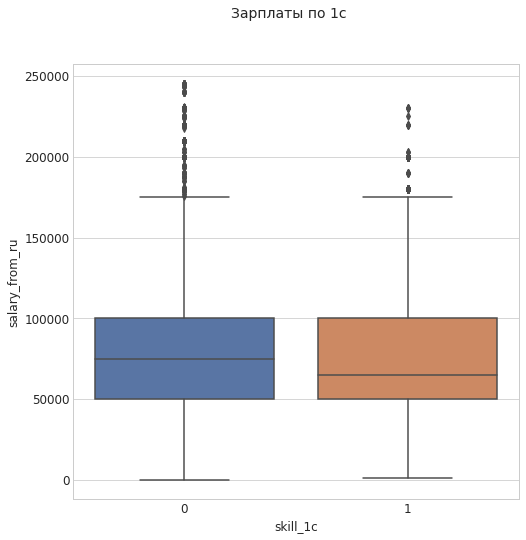

In [167]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='skill_1c', y='salary_from_ru', data=df)
plt.suptitle('Зарплаты по 1с', size=14)
plt.show()

Проверим гипотезу о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть 1с или нет 1с. 
Так как ранее мы определили, что данные по начальной зарплате не соответствуют нормальному распределению, то с 2-мя группами применяем критерий Манна-Уитни.

In [168]:
ps_0 = np.array(df[df.skill_1c == 0]['salary_from_ru'])
ps_1 = np.array(df[df.skill_1c == 1]['salary_from_ru'])
scipy.stats.mannwhitneyu(ps_0, ps_1)

MannwhitneyuResult(statistic=92950051.5, pvalue=0.8881181366385653)

📌 Гипотеза о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть 1с или нет 1с **не подтвердилась** (p-value > 0,05)

Повторим для sql, soft_skills и unix

In [169]:
def count_sql(text):
    pattern = ['sql', 'postgresql']
    cnt = 0

    if isinstance(text, list): 
        text = ', '.join(text)
    for element in pattern:
        if re.search(element, text) is not None:
            cnt = 1
    return cnt

df['skill_sql'] = 0
df['skill_sql'] = df.key_skills_name.apply(count_sql)

df['skill_sql'].value_counts()

0    34182
1     9349
Name: skill_sql, dtype: int64

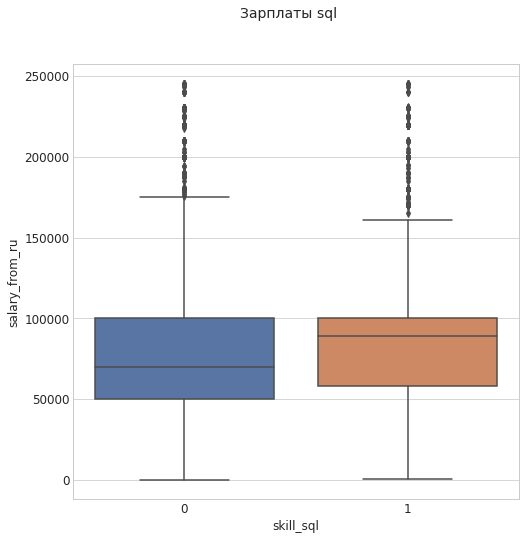

In [170]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='skill_sql', y='salary_from_ru', data=df)
plt.suptitle('Зарплаты sql', size=14)
plt.show()

Проверим гипотезу о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть sql или нет sql. 

In [171]:
sql_0 = np.array(df[df.skill_sql == 0]['salary_from_ru'])
sql_1 = np.array(df[df.skill_sql == 1]['salary_from_ru'])
scipy.stats.mannwhitneyu(sql_0, sql_1)

MannwhitneyuResult(statistic=134447959.0, pvalue=1.322845128351359e-124)

📌 Гипотеза о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть sql или нет sql **подтвердилась** (p-value < 0,05)

In [172]:
def count_soft_skills(text):
    pattern = ['команд', 'речь', 'мышлен', 'перепис', 'навык', 'грамотн', 'делов']
    cnt = 0

    if isinstance(text, list): 
        text = ', '.join(text)
    for element in pattern:
        if re.search(element, text) is not None:
            cnt = 1
    return cnt

df['soft_skills'] = 0
df['soft_skills'] = df.key_skills_name.apply(count_soft_skills)

df['soft_skills'].value_counts()

0    35817
1     7714
Name: soft_skills, dtype: int64

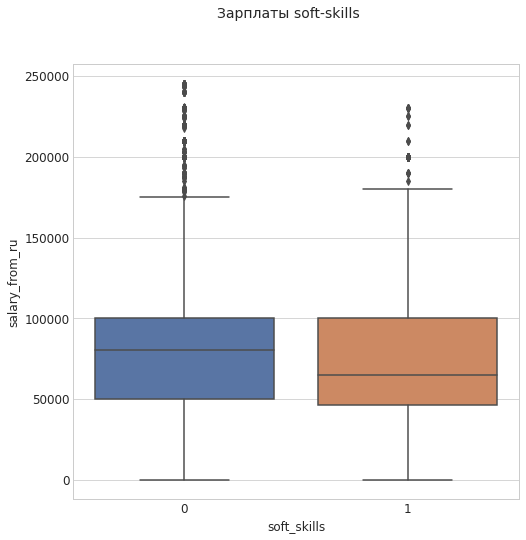

In [173]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='soft_skills', y='salary_from_ru', data=df)
plt.suptitle('Зарплаты soft-skills', size=14)
plt.show()

Проверим гипотезу о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть soft-skills или их нет. 

In [174]:
soft_skills_0 = np.array(df[df.soft_skills == 0]['salary_from_ru'])
soft_skills_1 = np.array(df[df.soft_skills == 1]['salary_from_ru'])
scipy.stats.mannwhitneyu(soft_skills_0, soft_skills_1)

MannwhitneyuResult(statistic=148821389.5, pvalue=5.3922338414170515e-27)

📌 Гипотеза о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть sofr-skills или их нет **подтвердилась** (p-value < 0,05)

In [175]:
def count_unix(text):
    pattern = ['linux', 'unix']
    cnt = 0

    if isinstance(text, list): 
        text = ', '.join(text)
    for element in pattern:
        if re.search(element, text) is not None:
            cnt = 1
    return cnt

df['skill_unix'] = 0
df['skill_unix'] = df.key_skills_name.apply(count_unix)

df['skill_unix'].value_counts()

0    38617
1     4914
Name: skill_unix, dtype: int64

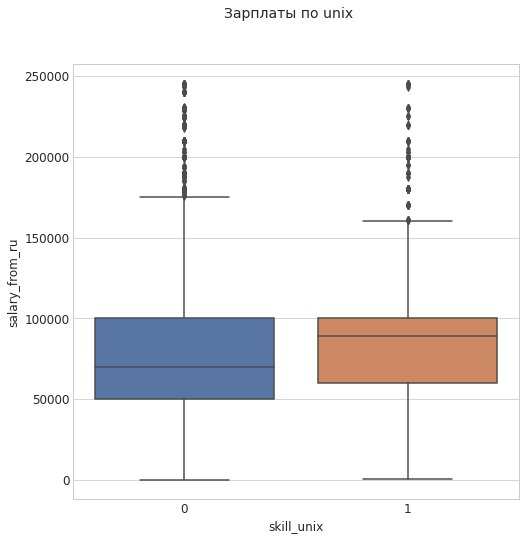

In [176]:
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x='skill_unix', y='salary_from_ru', data=df)
plt.suptitle('Зарплаты по unix', size=14)
plt.show()

Проверим гипотезу о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть unix или нет unix. 

In [177]:
unix_0 = np.array(df[df.skill_unix == 0]['salary_from_ru'])
unix_1 = np.array(df[df.skill_unix == 1]['salary_from_ru'])
scipy.stats.mannwhitneyu(unix_0, unix_1)

MannwhitneyuResult(statistic=78875978.0, pvalue=2.1961519359331083e-84)

📌 Гипотеза о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть unix или нет unix **подтвердилась** (p-value < 0,05)

### 🔶 Анализируем вакансии в столбце 'name'

Смотрим группировку вакансий по наименованию

Посмотрим ТОП вакансий по столбцу name

In [178]:
df.name.value_counts().loc[lambda x: x>200].reset_index()

,index,name
0,системный администратор,1653
1,программист 1с,1131
2,специалист технической поддержки,478
3,системный аналитик,466
4,аналитик,343
5,инженер-программист,328
6,программист 1c,324
7,графический дизайнер,313
8,инженер технической поддержки,274
9,бизнес-аналитик,269


Посмотрим количество сгруппированных вакансий

In [179]:
df.name.value_counts().loc[lambda x: x>1].sum()

27850

15,7 тыс. вакансий не сгруппировалось

In [180]:
df.name.value_counts().loc[lambda x: x==1].sum()

15681

In [181]:
df['simple_name'] = df.name.apply(group_name)

In [182]:
salary_simple_name = df[['simple_name', 'salary_from_ru']]

In [183]:
salary_simple_name[:10]

,simple_name,salary_from_ru
0,security,"100,000.00"
1,security,"100,000.00"
2,security,"60,000.00"
3,security,"200,000.00"
4,other,"100,000.00"
5,security,"100,000.00"
6,support,"100,000.00"
7,security,"100,000.00"
8,other,"100,000.00"
9,security,"100,000.00"


посмотрим статистику

In [184]:
sn = (salary_simple_name
    .groupby('simple_name')['salary_from_ru']
    .agg(['count', 'mean', 'median', 'max', 'min'])
    .sort_values(
        ['median', 'count'], ascending=[False, False]
        )
    .reset_index()
)

In [185]:
sn[:5]

,simple_name,count,mean,median,max,min
0,devops,986,"94,830.17","100,000.00","245,000.00","13,000.00"
1,ui ux,352,"91,262.78","100,000.00","245,000.00","15,000.00"
2,unix,227,"90,172.91","100,000.00","245,000.00","25,000.00"
3,product,195,"94,328.72","100,000.00","200,000.00","25,000.00"
4,soft-skills,103,"91,570.39","100,000.00","220,000.00","20,000.00"


отсортируем зарплаты

In [249]:
sn.sort_values('median', ascending=False)[:20]

,simple_name,count,mean,median,max,min
0,devops,986,"94,830.17","100,000.00","245,000.00","13,000.00"
2,unix,227,"90,172.91","100,000.00","245,000.00","25,000.00"
3,product,195,"94,328.72","100,000.00","200,000.00","25,000.00"
4,soft-skills,103,"91,570.39","100,000.00","220,000.00","20,000.00"
5,windows,14,"106,142.86","100,000.00","200,000.00","89,000.00"
1,ui ux,352,"91,262.78","100,000.00","245,000.00","15,000.00"
12,python,505,"92,310.80","89,000.00","243,000.00",105.00
16,fullstack,106,"92,091.98","89,000.00","200,000.00","20,000.00"
15,sap,333,"81,629.77","89,000.00","230,000.00","18,000.00"
14,2d 3d,340,"78,010.31","89,000.00","175,000.00","20,000.00"


In [248]:
sn.sort_values('count', ascending=False)[:20]

,simple_name,count,mean,median,max,min
28,other,12830,"73,541.20","69,000.00","245,000.00",25.00
26,1c,4815,"82,105.26","70,000.00","230,000.00",60.00
33,support,3930,"55,845.50","50,000.00","220,000.00","10,000.00"
31,sysadmin,2747,"65,884.19","60,000.00","200,000.00",30.00
6,qa,2736,"85,621.90","89,000.00","245,000.00",180.00
7,аналитик,2273,"77,704.03","89,000.00","230,000.00",30.00
8,security,1493,"78,061.72","89,000.00","220,000.00","8,000.00"
19,java,1129,"82,190.25","80,000.00","245,000.00",180.00
20,c c+ c#,1115,"82,497.69","80,000.00","240,000.00","20,000.00"
9,system analyst,1071,"85,921.18","89,000.00","230,000.00","10,000.00"


In [245]:
sn.sort_values('max', ascending=False)[:20]

,simple_name,count,mean,median,max,min
0,devops,986,"94,830.17","100,000.00","245,000.00","13,000.00"
10,frontend,988,"89,116.66","89,000.00","245,000.00","15,000.00"
22,javascript,419,"92,316.23","80,000.00","245,000.00","27,000.00"
21,php,759,"93,278.95","80,000.00","245,000.00","1,500.00"
19,java,1129,"82,190.25","80,000.00","245,000.00",180.00
1,ui ux,352,"91,262.78","100,000.00","245,000.00","15,000.00"
28,other,12830,"73,541.20","69,000.00","245,000.00",25.00
13,ios,386,"89,494.17","89,000.00","245,000.00","30,000.00"
23,android,403,"81,977.05","80,000.00","245,000.00","35,000.00"
6,qa,2736,"85,621.90","89,000.00","245,000.00",180.00


📌 Самые высокие медианы зарплат у специалистов devops, unix, ui/ux, windows и продактов (100 тыс.руб.).
Devops, unix и  ui/ux - специалисты среди лидеров по размеру максимальных начальных зарплат (245 тыс.руб.).
Больше всего вакансий 1С с медианной зарплатой в размере 70 тыс.руб. Так же среди лидеров по количеству вакансий support (медиана – 50 тыс.руб.), системные администраторы (60 тыс.руб.) и тестировщики, аналитики и безопасники с медианой в 89 тыс.руб.


### 🔶 Работаем со столбцом 'experience'

In [187]:
df.experience[0]

"{'id': 'between1and3', 'name': 'от 1 года до 3 лет'}"

вытаскиваем тег name

In [188]:
# добавляем обработку None
def get_tag_experience_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [189]:
df['experience_name'] = df.experience.apply(get_tag_experience_name)

создаем функцию возвращающую числовые значения

In [190]:
def get_expirience(text):
    if re.search(r'от 1 года до 3 лет', text) is not None:
        text = 1
    elif re.search(r'от 3 до 6 лет', text) is not None:
        text = 3
    elif re.search(r'нет опыта', text) is not None:
        text = 0
    elif re.search(r'более 6 лет', text) is not None:
        text = 6
    else:
        text = -1
    return text

In [191]:
df['experience_category'] = df.experience_name.apply(get_expirience)

📌 experience_name и experience_category - категориальный тип данных.

In [192]:
df.experience_name.isna().sum()

0

In [193]:
df.experience_name.value_counts().reset_index()

,index,experience_name
0,'от 1 года до 3 лет',23147
1,'от 3 до 6 лет',13947
2,'нет опыта',5124
3,'более 6 лет',1313


In [194]:
df.experience_category.value_counts().reset_index()

,index,experience_category
0,1,23147
1,3,13947
2,0,5124
3,6,1313


посмотрим их доли

In [195]:
df.experience_name.value_counts(normalize=True).reset_index()

,index,experience_name
0,'от 1 года до 3 лет',0.53
1,'от 3 до 6 лет',0.32
2,'нет опыта',0.12
3,'более 6 лет',0.03


<function matplotlib.pyplot.show(close=None, block=None)>

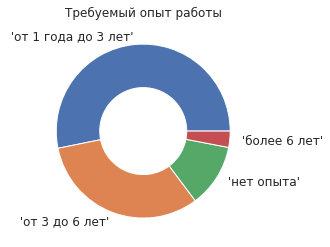

In [196]:
plt.pie(
    df.experience_name.value_counts().values,
    labels=df.experience_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Требуемый опыт работы')
plt.show

📌 Больше всего вакансий с опытом работы от 1 года до 3-х лет (53%). Для кандидатов без опыта доля вакансий составляет всего 12%.

### 🔶 Работаем со столбцом 'schedule'

In [197]:
df.schedule[0]

"{'id': 'fullday', 'name': 'полный день'}"

вытаскиваем тег name

In [198]:
# добавляем обработку None
def get_tag_schedule_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [199]:
df['schedule_name'] = df.schedule.apply(get_tag_schedule_name)

In [200]:
df.schedule_name[1]

" 'полный день'"

📌 schedule_name - категориальный тип данных.

In [201]:
df.schedule_name.isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

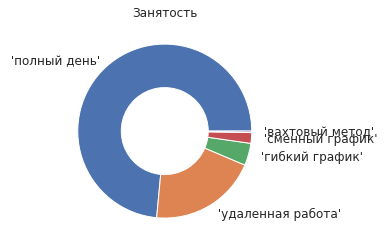

In [202]:
plt.pie(
    df.schedule_name.value_counts().values,
    labels=df.schedule_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Занятость')
plt.show

In [203]:
df.schedule_name.value_counts()

 'полный день'         32002
 'удаленная работа'     8750
 'гибкий график'        1794
 'сменный график'        866
 'вахтовый метод'        119
Name: schedule_name, dtype: int64

In [204]:
df.schedule_name.value_counts(normalize=True)

 'полный день'        0.74
 'удаленная работа'   0.20
 'гибкий график'      0.04
 'сменный график'     0.02
 'вахтовый метод'     0.00
Name: schedule_name, dtype: float64

создаем функцию для разделения на 2 категории: 1) полный день 2) все остальное

In [205]:
def fulltime(text):
    if text.find('полный день') == -1:
        return 0
    else:
        return 1

In [206]:
df['full_time'] = df.schedule_name.apply(fulltime)

📌 full_time - категориальный тип данных.

In [207]:
df.full_time.value_counts()

1    32002
0    11529
Name: full_time, dtype: int64

посмотрим среднее значение начальных зарплат по этим двум категориям

In [208]:
df.groupby('full_time')['salary_from_ru'].mean()

full_time
0   77,625.61
1   75,919.59
Name: salary_from_ru, dtype: float64

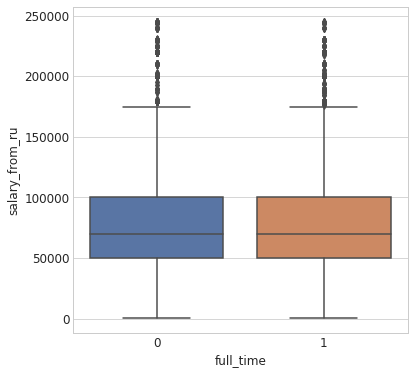

In [209]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='full_time', y='salary_from_ru', data=df)

посмотрим значения box-plot

In [210]:
get_boxplot_values(df[df.full_time == 0]['salary_from_ru'])

lower_whisker:  42.0
quartile_25:  50000.0
median:  70000.0
quartile_75:  100000.0
upper_whisker:  175000.0


In [211]:
get_boxplot_values(df[df.full_time == 1]['salary_from_ru'])

lower_whisker:  25.0
quartile_25:  50000.0
median:  70000.0
quartile_75:  100000.0
upper_whisker:  175000.0


📌 box plot`ы очень похожи. При этом количество значений и средние значения в двух группах разные.

Проверим гипотезу о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: на полный день и остальные варианты. 
Так как ранее мы определили, что данные по начальной зарплате не соответствуют нормальному распределению, то с 2-мя группами применяем критерий Манна-Уитни.

In [212]:
ft = df[['salary_from_ru','full_time']]
ft_0 = ft[ft.full_time == 0]
ft_1 = ft[ft.full_time == 1]

In [213]:
scipy.stats.mannwhitneyu(ft_0.salary_from_ru, ft_1.salary_from_ru)

MannwhitneyuResult(statistic=182493928.0, pvalue=0.08394857623981809)

📌 Оставляем нулевую гипотезу об отсутствии различий между зарплатами по вакансиям на полный день и на part-time. P-value > 0,05

### 🔶 ✂ Почистим dataframe от служебных столбцов

In [214]:
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region',
 'specializations_jsn',
 'profarea_id',
 'profarea_id_1',
 'salary_currency',
 'salary_from',
 'salary_from_ru',
 'salary_from_ru_median',
 'band_salary',
 'specializations_name',
 'key_skills_jsn',
 'key_skills_name',
 'skill_1c',
 'skill_sql',
 'soft_skills',
 'skill_unix',
 'simple_name',
 'experience_name',
 'experience_category',
 'schedule_name',
 'full_time']

In [215]:
df.drop(
    ['salary',
    'schedule',
    'experience',
    'key_skills',
    'specializations',
    'specializations_jsn',
    'profarea_id',
    'profarea_id_1',
    'salary_currency',
    'salary_from',
    'key_skills_jsn',
    ],
    axis=1,
    inplace=True)

In [216]:
df.head(1)

,id,name,region,salary_from_ru,salary_from_ru_median,band_salary,specializations_name,key_skills_name,skill_1c,skill_sql,soft_skills,skill_unix,simple_name,experience_name,experience_category,schedule_name,full_time
0,50632962,консультант по информационной безопасности,Москва,"100,000.00","100,000.00",от 50 до 100 т.р. вкл,"[компьютерная безопасность, консалтинг, аутсор...","[информационная безопасность, аудит информацио...",0,0,0,0,security,'от 1 года до 3 лет',1,'полный день',1


### 🔶 Посмотрим связь двух категориальных признаков по скиллам sql и unix

построим таблицу сопряженности

In [217]:
sql_unix = pd.crosstab(df.skill_sql, df.skill_unix)
sql_unix

skill_unix,0,1
skill_sql,,
0,31254,2928
1,7363,1986


тоже в долях

In [218]:
sql_unix = pd.crosstab(df.skill_sql, df.skill_unix, normalize=True)
sql_unix

skill_unix,0,1
skill_sql,,
0,0.72,0.07
1,0.17,0.05


<AxesSubplot:xlabel='skill_unix', ylabel='count'>

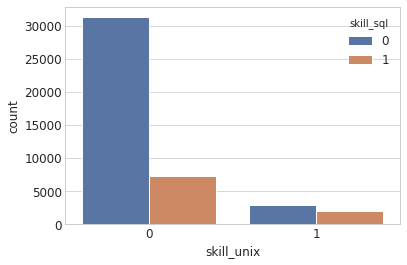

In [219]:
sns.countplot(x=df.skill_unix, hue=df.skill_sql)

In [220]:
chi2, prob, dof, expected = scipy.stats.chi2_contingency(sql_unix)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, dof, prob))

test Statistics: 0.0
degrees of freedom: 1
p-value: 1.0



📌 Оставляем нулевую гипотезу о незначимости связи между sql-скиллами и unix_скиллами (p-value > 0,05).

### 🔶 Создадим dataframe df_stat для анализа средней зарплаты, сгруппированных вакансий, среднего количества скиллов по вакансии. Есть ли связь между данными показателями?

создадим функцию для подсчета количества элементов в списке

In [221]:
def sum_obj(lst):
    return len(lst)

In [222]:
df.head(1)

,id,name,region,salary_from_ru,salary_from_ru_median,band_salary,specializations_name,key_skills_name,skill_1c,skill_sql,soft_skills,skill_unix,simple_name,experience_name,experience_category,schedule_name,full_time
0,50632962,консультант по информационной безопасности,Москва,"100,000.00","100,000.00",от 50 до 100 т.р. вкл,"[компьютерная безопасность, консалтинг, аутсор...","[информационная безопасность, аудит информацио...",0,0,0,0,security,'от 1 года до 3 лет',1,'полный день',1


просуммируем количество скиллов по вакансии

In [223]:
df['sum_skills'] = df.key_skills_name.apply(sum_obj)

In [224]:
df.shape

(43531, 18)

подсчитаем среднее количество скиллов по каждой вакансии

In [225]:
df_stat_1 = (df
    .groupby('simple_name')['sum_skills']
    .mean()
    .reset_index()
)

заджойним с sn (salary_name) по столбцу 'simple_name'

In [226]:
df_stat_1 = df_stat_1.merge(sn, on='simple_name',how='inner')

In [227]:
df_stat_1[:2]

,simple_name,sum_skills,count,mean,median,max,min
0,.net,7.40,243,"76,269.55","65,000.00","220,000.00","34,500.00"
1,1c,8.31,4815,"82,105.26","70,000.00","230,000.00",60.00


переименуем столбцы

In [228]:
df_stat_1 = df_stat_1.rename(columns={
                        'mean': 'salary_mean',
                        'count': 'count_simple_name',
                        'sum_skills': 'skills_mean',
                        'median': 'salary_median',
                        'max': 'salary_max',
                        'min': 'salary_min'})

In [229]:
df_stat_1.head()

,simple_name,skills_mean,count_simple_name,salary_mean,salary_median,salary_max,salary_min
0,.net,7.40,243,"76,269.55","65,000.00","220,000.00","34,500.00"
1,1c,8.31,4815,"82,105.26","70,000.00","230,000.00",60.00
2,2d 3d,7.39,340,"78,010.31","89,000.00","175,000.00","20,000.00"
3,android,7.02,403,"81,977.05","80,000.00","245,000.00","35,000.00"
4,backend,7.43,263,"87,257.62","80,000.00","240,000.00","15,000.00"


визуализируем парные зависимости между 3-мя переменными: средней зарплатой по вакансии, количеством той или иной вакансии, средним значением количества скиллов по вакансии.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='salary_mean', ylabel='count_simple_name'>

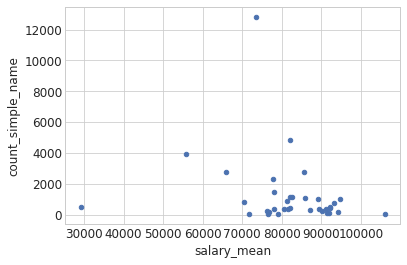

In [230]:
df_stat_1.plot('salary_mean', 'count_simple_name', kind='scatter')

📌 влияние средней зарплаты и количества вакансии не наблюдается

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='salary_mean', ylabel='skills_mean'>

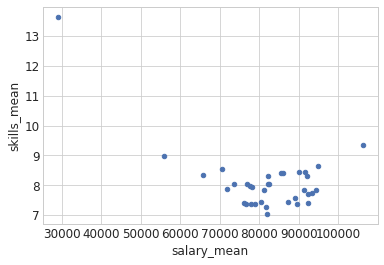

In [231]:
df_stat_1.plot('salary_mean', 'skills_mean', kind='scatter')

📌 влияние средней зарплаты и среднего количества скиллов по вакансии скорее отсутствует

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='count_simple_name', ylabel='skills_mean'>

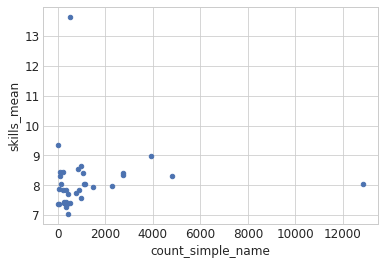

In [232]:
df_stat_1.plot('count_simple_name', 'skills_mean', kind='scatter')

📌 возможно есть определенное влияние количества вакансии и среднего количества скиллов по данной вакансии

уберем выбросы

In [233]:
df_stat_2 = df_stat_1[~df_stat_1.simple_name.isin(['yandex', 'other'])]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='count_simple_name', ylabel='skills_mean'>

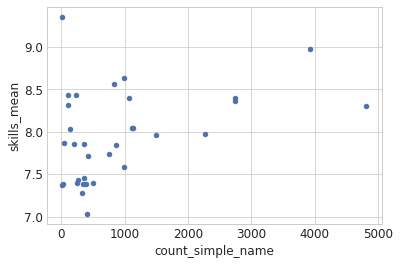

In [234]:
df_stat_2.plot('count_simple_name', 'skills_mean', kind='scatter')

построим график парной регрессии

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


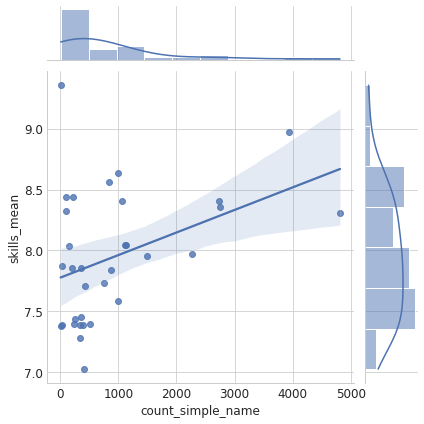

In [235]:
sns.jointplot('count_simple_name', 'skills_mean', data=df_stat_2, kind="reg")

📌 Возможно есть определенная зависимость среднего значения количества скиллов по вакансии от количества вакансий. Облако не плотное вдоль построенной прямой. Доверительный интервал регрессионной функции относительно широкий.
Посмотрим как изменяется среднее значение количества скиллов (skills_mean - целевая переменная) от количества вакансий (count_simple_name - значение фактора).

In [236]:
LR = lm.LinearRegression()

In [237]:
mod1 = LR.fit(df_stat_2[['count_simple_name']], df_stat_2[['skills_mean']])

In [238]:
mod1.intercept_, mod1.coef_

(array([7.77589669]), array([[0.00018548]]))

Формула модели:
<skills_mean> = <count_simple_name> x <0.00021991> + <7.694>

In [239]:
r2 = mod1.score(df_stat_2[['count_simple_name']],df_stat_2[['skills_mean']])
r2

0.15883000492169053

📌 Коэффициент детерминации составляет 29,6 %, что достаточно мало для утверждения о том, что данные показатели основные, влияющие друг на друга.

#### OLS

In [240]:
res_1 = smf.ols('skills_mean ~ count_simple_name', data=df_stat_2).fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            skills_mean   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.853
Date:                Thu, 22 Sep 2022   Prob (F-statistic):             0.0216
Time:                        13:04:05   Log-Likelihood:                -22.917
No. Observations:                  33   AIC:                             49.83
Df Residuals:                      31   BIC:                             52.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7759      0.112     69.554      0.000       7.548       8.004
count_simple_name     0.0002   7.67e-05      2.419      0.022    2.91e-05       0.000
==============================================================================
Omnibus:                        9.597   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.352
Skew:                           1.028   Prob(JB):                       0.0154
Kurtosis:                       4.358   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

📌 Что мы видим: коэффициент детерминации R-squared равен 29,6% - присутствует определенное влияние факторов, эти факторы возможно связаны функциональной зависимостью.

p-value < 0,05 (0,00228)
что позволяет нам отвергнуть нулевую гипотезу о неадекватности нашей модели.

Однако, данный анализ имеет недостаточное практическое значение и скорее нужен для учебных целей.

## 🟩 Выводы

📌 Мы провели первичный анализ датасета и анализ колонок. Очистили датасет от данных, не относящихся к IT.

Вытащили данные по начальной зарплате (salary from). Привели все зарплаты к единой валюте (RUR). Пустые ячейки заполнили медианными значениями зарплаты в зависимости от региона. После заполнения пустых ячеек медиана по зарплате увеличилась  65 тыс.руб.с до 76 тыс.руб. Получается, что пустые ячейки по зарплатам были заполнены более высокими значениями.
В лидерах по уровню зарплаты регионы Москва, Санкт-Петербург, Адыгея (данный регион скорее всего попал в топ случайно). В аутсайдерах регионы Северного Кавказа.

Средняя медиана по стране составляет 46 тыс.руб. Самые высокие медианы зарплат у специалистов devops, ui/ux и продактов ( по 100 т.руб.). Следом идут тестировщики и аналитики (по 89 т.руб.). У специалистов ERP минимальная зарплата самая высокая среди других групп, правда и их количество всего лишь 38

Построенная гистограмма распределения частоты специализации показывает отсутствие концентрации вакансий по нескольким специализациям.  Наоборот, очень много маленьких групп с частотой специализации от 1 до 6. Наибольшее количество упоминаний у специализаций: 1) инженер - 30419, 2) программирование, разработка - 21295, и 3) системы управления предприятием (erp) - 15691. 
Можно предположить наличие спроса на кандидатов с инженерным мышлением/образованием/бэкграундом для разработки с пониманием бизнеса и процессов на предприятиях.

Анализ столбца key_skills показал, что  наибольшая частота упоминаний у 1С, SQL, Unix, Java и Git. Среди лидеров такие языки программирования, как Python и JavaScript.

Мы проанализировали как наличие 4-х наиболее распространенных скиллов влияют на уровень зарплаты. Тест Манна-Уитни  позволяет сделать следующие заключения:

Гипотеза о наличии статистически значимых различий по уровню начальных зарплат в двух группах вакансий: есть 1с или нет 1с не подтвердилась (p-value > 0,05).
В трех других случаях со скиллами sql, софт-скиллами и unix гипотеза о наличии статистически значимых различий по уровню начальных зарплат подтвердилась (p-value < 0,05)

Больше всего вакансий с опытом работы от 1 года до 3-х лет (53%). Для кандидатов без опыта доля вакансий составляет всего 12%. 
Занятость на полный день преобладает в вакансиях (73%). Похожесть boxplot с вакансиями на полный рабочий день и остальных дает нам основание предположить, что по зарплатам эти группы тоже схожи. Анализ по критерию Манна-Уитни не позволил отклонить нулевую гипотезу об отсутствии различий между зарплатами по вакансиям на полный день и на part-time. P-value > 0,05.

Анализ таблицы сопряженности для двух категориальных признаков по скиллам sql и unix не позволил отвергнуть нулевую гипотезу о незначимости связи между ними (p-value > 0,05).

Скорее в учебных целях, построили модель линейной регресии, показывающую как изменяется среднее значение количества скиллов по вакансии от количества вакансий. Был подсчитан коэффициент детерминации, который составил 29,6%, что достаточно мало для утверждения о том, что данные показатели основные, влияющие друг на друга. При этом p-value составил 0,00228, что позволило нам отвергнуть нулевую гипотезу о неадекватности нашей модели.



## 🟩 Сохраним dataframe в excel-файле

In [250]:
# with pd.ExcelWriter('tomsk_eda.xlsx') as writer:
#     df.to_excel(writer)
#     print('DataFrame is written successfully to Excel File')

DataFrame is written successfully to Excel File


In [277]:
# with pd.ExcelWriter('simple_skill_salary.xlsx') as writer:
#     simple_skill_salary.to_excel(writer)
#     print('DataFrame is written successfully to Excel File')

DataFrame is written successfully to Excel File
